In [88]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/sun.hong/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# input data

In [2]:
#path = "/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/"
path = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/08132018_for_Joh/abp1gfp_and_fim1gfp_110msec_07232018/"


#what data is good for inflection point

# the fim1 dynamics, do not exclude much (or anything), this is good for the intensity alignment point!



################
# THESE ARE THE ONLY PARAMETERS TO CHANGE

# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"budding_yeast_abp1_gfp/"
#path_to_all_tracks_data = path+"fission_yeast_fim1_gfp/"

allTracksFilename = 'all_tracks.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

excludeTheFirstNFrames = 5

###
# FOR FUTURE, do not change (yet)
###
# determine alignment method
#alignmentMethod = 'inflectionPoint'

alignmentMethod = 'intensity'
align_intensity_threshold = 0.5 # 50% intensity alignment

################


outputpath = path_to_all_tracks_data

In [3]:
filenamesData = pd.read_csv(outputpath+allTracksFilename+"_allProcessedFilePaths.csv")
filenamesData[0:5]

,Unnamed: 0,filenames
0,0,/Users/johannesschoeneberg/Desktop/Schoeneberg...
1,1,/Users/johannesschoeneberg/Desktop/Schoeneberg...
2,2,/Users/johannesschoeneberg/Desktop/Schoeneberg...
3,3,/Users/johannesschoeneberg/Desktop/Schoeneberg...
4,4,/Users/johannesschoeneberg/Desktop/Schoeneberg...


In [4]:
# get all lifetimes

trackIds = []
lifetimes_frames = []
lifetimes_seconds = []
maxIntensities = []

filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    trackIds.append(trackId)
    lifetimes_frames.append(lifetime_frames)
    lifetimes_seconds.append(lifetime_seconds)
    maxIntensities.append(max_intensity_AU)

# export these values into an excel
combinedDataFilePath = outputpath+allTracksFilename+'_allProcessedFiles_summary.csv'
print(combinedDataFilePath)
df = pd.DataFrame()
df['trackIds'] = trackIds
df['lifetimes_frames'] = lifetimes_frames
df['lifetimes_seconds'] = lifetimes_seconds
df['maxIntensities'] = maxIntensities
df.to_csv(combinedDataFilePath)

/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/08132018_for_Joh/abp1gfp_and_fim1gfp_110msec_07232018/budding_yeast_abp1_gfp/all_tracks.csv_allProcessedFiles_summary.csv


In [5]:
print(lifetimes_frames)

[109, 145, 127, 110, 139, 136, 115, 125, 131, 96, 258, 125, 108, 142, 110, 99, 101, 83, 130, 100, 122, 139, 115, 120, 126, 85, 118, 114, 128, 111, 120, 138, 121, 89, 126]


/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/08132018_for_Joh/abp1gfp_and_fim1gfp_110msec_07232018/budding_yeast_abp1_gfp/plot_lifetime_frames_distribution.png


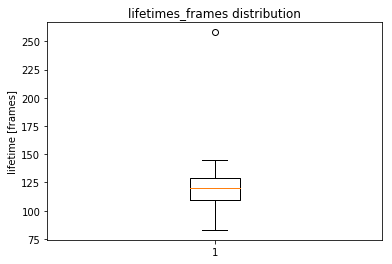

In [6]:
plt.boxplot(lifetimes_frames)
plt.title('lifetimes_frames distribution')
plt.ylabel('lifetime [frames]')
outputFigurePath= outputpath+"plot_lifetime_frames_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/08132018_for_Joh/abp1gfp_and_fim1gfp_110msec_07232018/budding_yeast_abp1_gfp/plot_lifetime_seconds_distribution.png


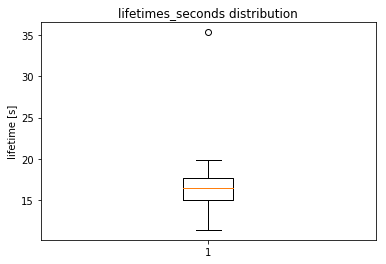

In [7]:
plt.boxplot(lifetimes_seconds)
plt.title('lifetimes_seconds distribution')
plt.ylabel('lifetime [s]')
outputFigurePath= outputpath+"plot_lifetime_seconds_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/08132018_for_Joh/abp1gfp_and_fim1gfp_110msec_07232018/budding_yeast_abp1_gfp/plot_maxIntensity_distribution.png


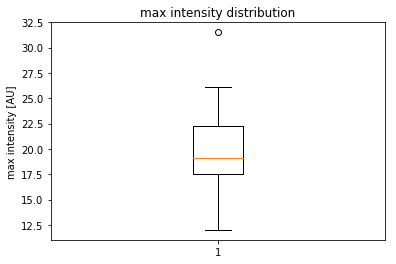

In [8]:
plt.boxplot(maxIntensities)
plt.title('max intensity distribution')
plt.ylabel('max intensity [AU]')
outputFigurePath= outputpath+"plot_maxIntensity_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Averaging - Align by Distance

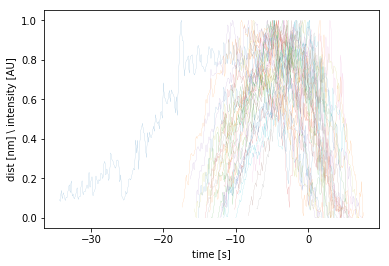

In [89]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPoint_fromIntensity_Index = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPointFrame = data['inflectionPointFrame'][0]
    inflectionPointTime = data['inflectionPointTime'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    #plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=3)
    plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=0.1)
    
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm] \ intensity [AU]')
    
    

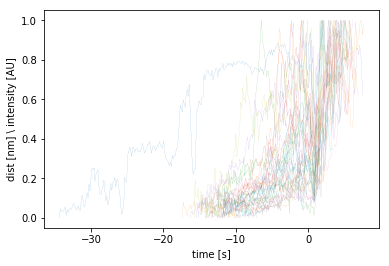

In [78]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPoint_fromIntensity_Index = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPointFrame = data['inflectionPointFrame'][0]
    inflectionPointTime = data['inflectionPointTime'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=0.1)
    #plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=1)
    
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm] \ intensity [AU]')
    
    

In [104]:
allFramesAccumulated_intensity = []
allFramesAccumulated_distance = []

N = 0

filenames = filenamesData['filenames']
for filename in filenames:
    
    framesAccumulator_intensity = np.zeros(1000)
    framesAccumulator_distance = np.zeros(1000)
    accumulatorZeroIndex = 500
    N += 1

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPoint_fromIntensity_Index = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPointFrame = data['inflectionPointFrame'][0]
    inflectionPointTime = data['inflectionPointTime'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
#    print(inflectionPointIndex)
    for dataIndex in range(0,len(time)):
        accumulatorIndex = accumulatorZeroIndex - inflectionPointIndex + dataIndex
        framesAccumulator_intensity[accumulatorIndex] =  framesAccumulator_intensity[accumulatorIndex] + intensity[dataIndex]
        framesAccumulator_distance[accumulatorIndex] =  framesAccumulator_distance[accumulatorIndex] + distance[dataIndex]
        
    
    framesAccumulator_intensity = np.array(framesAccumulator_intensity)
    allFramesAccumulated_intensity.append(framesAccumulator_intensity)
    
    
    framesAccumulator_distance = np.array(framesAccumulator_distance)
    allFramesAccumulated_distance.append(framesAccumulator_distance)



  
    

(350, 600)

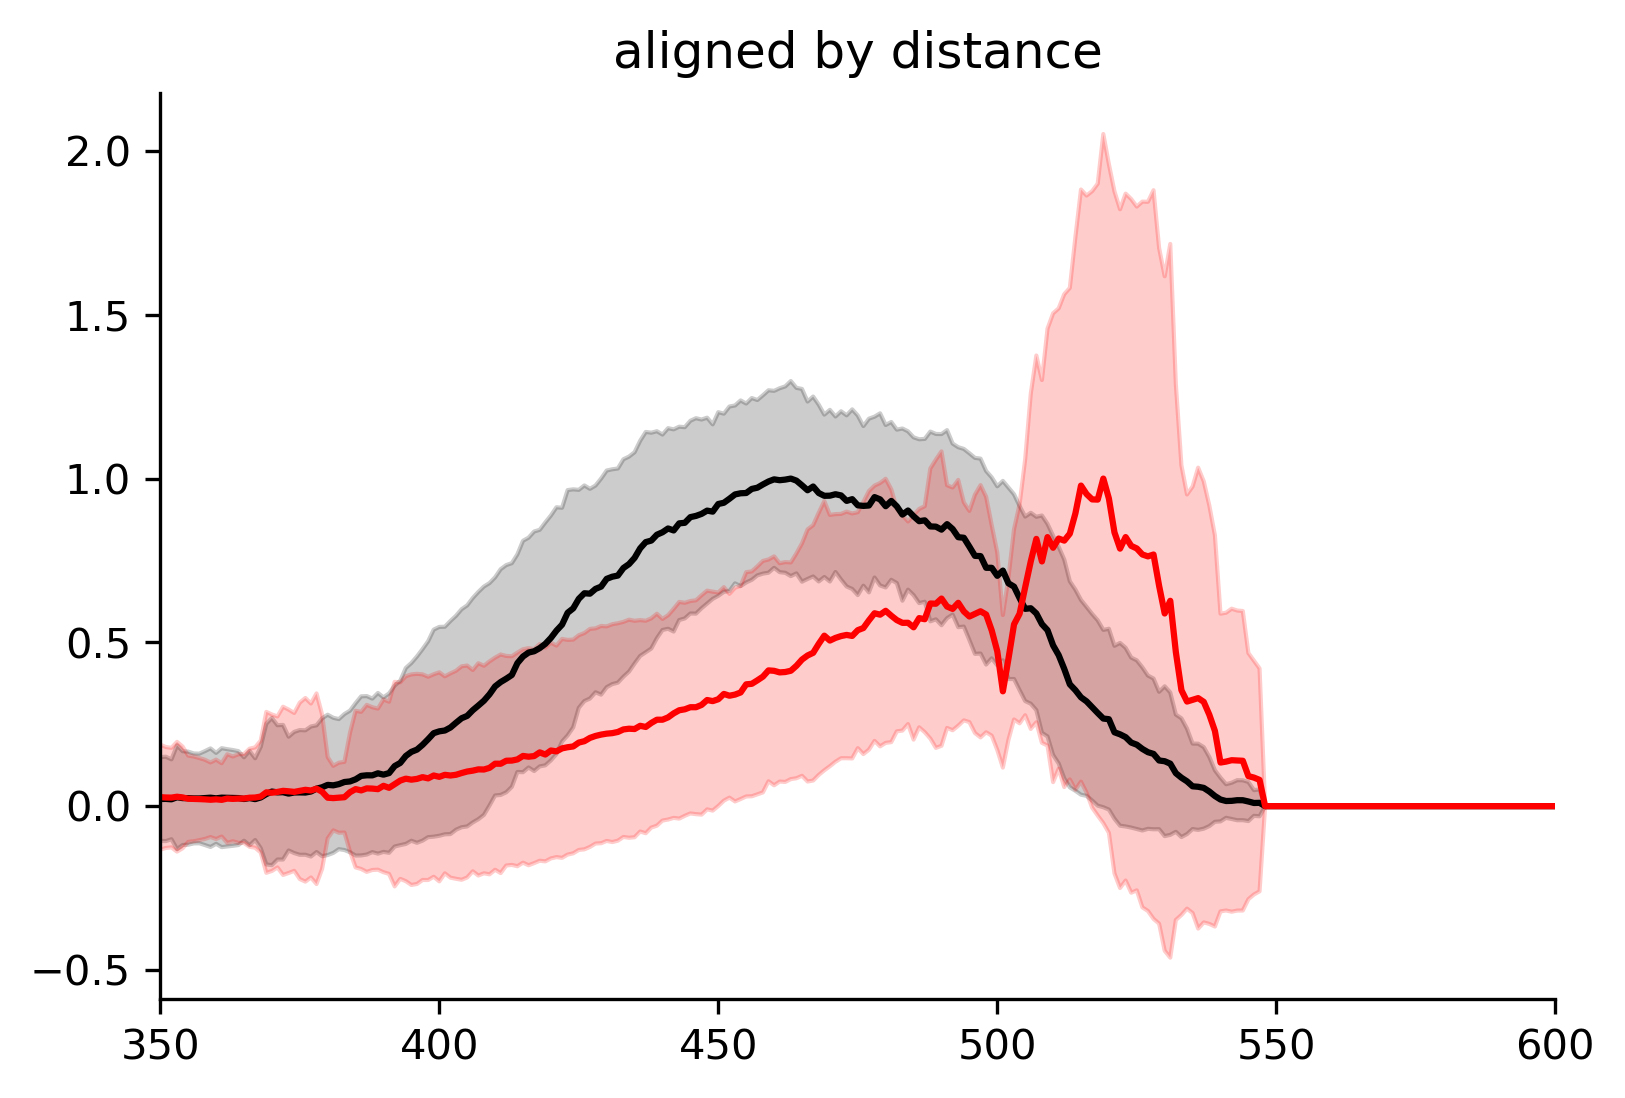

In [107]:

plt.figure(dpi=300)

#time = np.nanmean(adjusted_sampled_times,axis=0)
time = np.array(range(0,1000))

#intensity

mean = np.nanmean(allFramesAccumulated_intensity,axis=0)
std = np.nanstd(allFramesAccumulated_intensity,axis=0)
plt.plot(time,mean/max(mean),color='k')
plt.fill_between(time, (mean-std)/max(mean), (mean+std)/max(mean),color='k',alpha=0.2)


#distance
mean = np.nanmean(allFramesAccumulated_distance,axis=0)
std = np.nanstd(allFramesAccumulated_distance,axis=0)
plt.plot(time,mean/max(mean),color='r')
plt.fill_between(time, (mean-std)/max(mean) , (mean+std)/max(mean),color='r',alpha=0.2)







plt.title("aligned by distance")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlim(350,600)

# Averaging - Align by Intensity

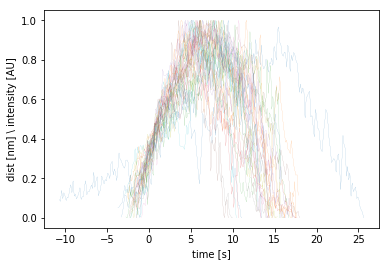

In [91]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointTime = data['inflectionPoint_fromIntensity_Time'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    #plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=3)
    plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=0.1)
    
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm] \ intensity [AU]')
    
    

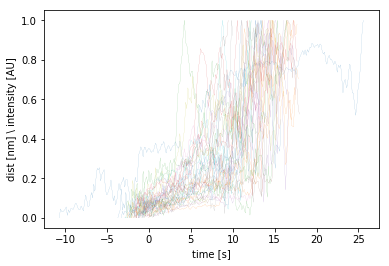

In [93]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointTime = data['inflectionPoint_fromIntensity_Time'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=0.1)
    #plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=1)
    
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm] \ intensity [AU]')
    
    

In [99]:
allFramesAccumulated_intensity = []
allFramesAccumulated_distance = []

N = 0

filenames = filenamesData['filenames']
for filename in filenames:
    
    framesAccumulator_intensity = np.zeros(1000)
    framesAccumulator_distance = np.zeros(1000)
    accumulatorZeroIndex = 500
    N += 1

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data

    inflectionPointIndex = data['inflectionPoint_fromIntensity_Index'][0]

    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
#    print(inflectionPointIndex)
    for dataIndex in range(0,len(time)):
        accumulatorIndex = accumulatorZeroIndex - inflectionPointIndex + dataIndex
        framesAccumulator_intensity[accumulatorIndex] =  framesAccumulator_intensity[accumulatorIndex] + intensity[dataIndex]
        framesAccumulator_distance[accumulatorIndex] =  framesAccumulator_distance[accumulatorIndex] + distance[dataIndex]
        
    
    framesAccumulator_intensity = np.array(framesAccumulator_intensity)
    allFramesAccumulated_intensity.append(framesAccumulator_intensity)
    
    
    framesAccumulator_distance = np.array(framesAccumulator_distance)
    allFramesAccumulated_distance.append(framesAccumulator_distance)



  


(450, 650)

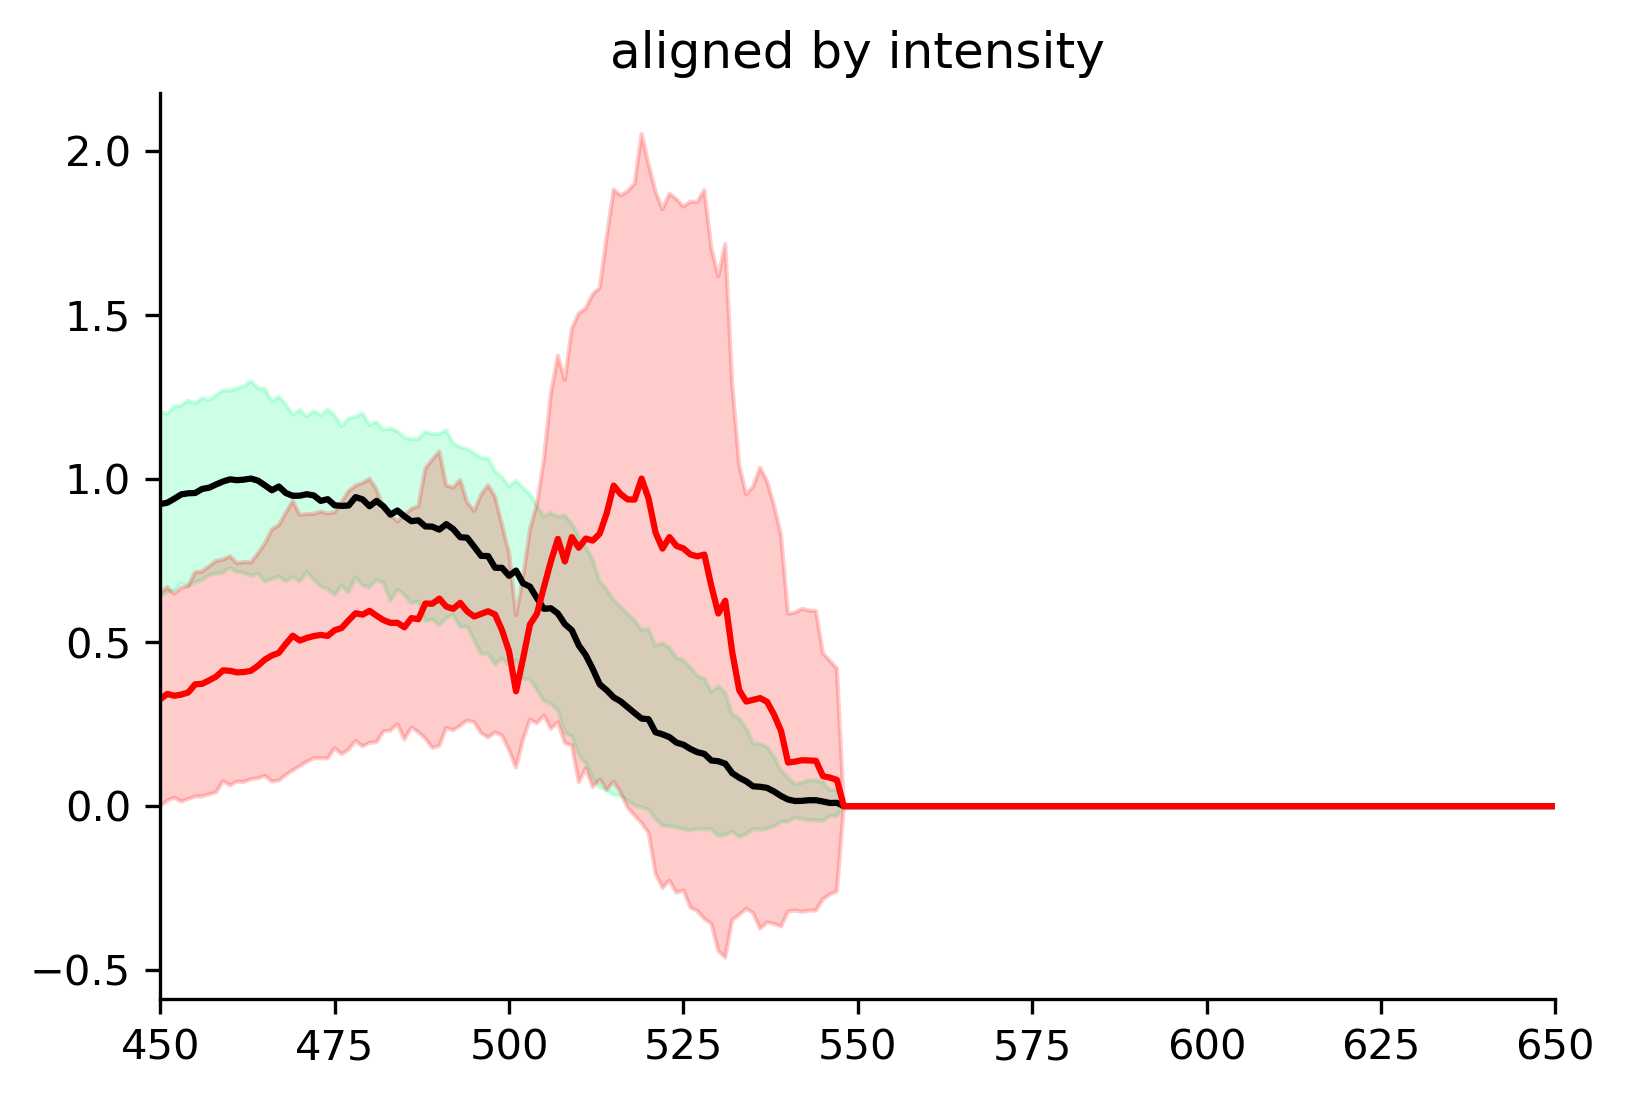

In [108]:

plt.figure(dpi=300)

#time = np.nanmean(adjusted_sampled_times,axis=0)
time = np.array(range(0,1000))

#intensity

mean = np.nanmean(allFramesAccumulated_intensity,axis=0)
std = np.nanstd(allFramesAccumulated_intensity,axis=0)

#plots the average of intensity
plt.plot(time,mean/max(mean),color='k')
#plots the standard deviation of intensity
plt.fill_between(time, (mean-std)/max(mean), (mean+std)/max(mean),color='k',alpha=0.2)


#distance
mean = np.nanmean(allFramesAccumulated_distance,axis=0)
std = np.nanstd(allFramesAccumulated_distance,axis=0)

#plots the average of intensity
plt.plot(time,mean/max(mean),color='r')
#plots the standard deviation of intensity
plt.fill_between(time, (mean-std)/max(mean) , (mean+std)/max(mean),color='red',alpha=0.2)







plt.title("aligned by intensity")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlim(450,650)